Scikit-learn 라이브러리
- 파이썬 기반의 대표적인 머신러닝 (오랜 기간) 안정성 검증된 라이브러리
- 머신러닝을 위한 다양한 알고리즘, 프레임워크, API 제공

In [ ]:
# scikit-learn 설치가 필요할 경우 (아나콘다가 설치되어 있으면 필요 없음)
!pip install scikit-learn

# 데이터 가져오기(전처리가 된 데이터)

In [1]:
from sklearn.datasets import load_digits
digits=load_digits()

# 데이터와 정답(샘플)

In [3]:
digits['data'] # 각 이미지를 숫자화 한 데이터

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# 각 이미지에 대한 정답
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits['data'].shape

(1797, 64)

# 이미지 확인

In [6]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

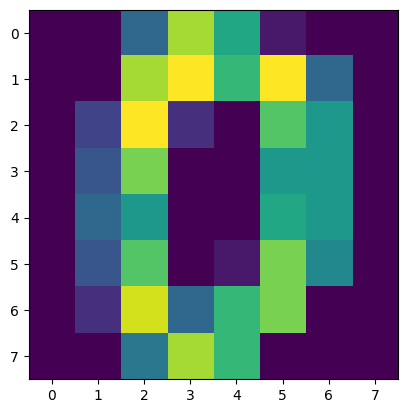

In [7]:
from matplotlib import pyplot as plt
plt.imshow(digits['images'][0])
plt.show()

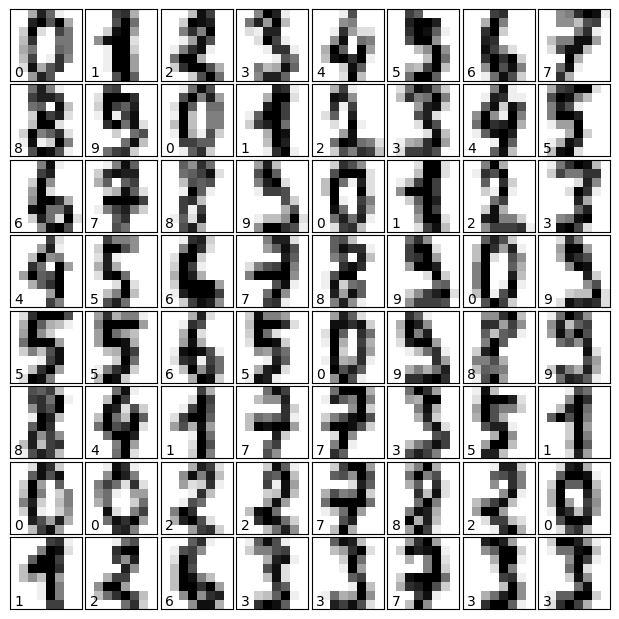

In [8]:
fig = plt.figure(figsize=(6,6)) # 각 이미지 사이즈를 6x6으로 설정
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # 서브플롯을 Figure 전체에 여백 없이 배치하고 간격을 최소화

# 8×8 서브플롯에 숫자 이미지 64개를 표시하고 각 이미지에 정답 라벨을 출력
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]))

# 훈련 집합을 기반으로 테스트 집합 만들기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# 모델로 예측 및 성능 평가

In [ ]:
# 모델 생성
from sklearn.naive_bayes import GaussianNB
OneOfNaiveBayesianModels = GaussianNB()

In [ ]:
OneOfNaiveBayesianModels.fit(X_train, y_train) # 학습

In [ ]:
predicted = OneOfNaiveBayesianModels.predict(X_test) # 예측

In [ ]:
# 성능 평가
fig = plt.figure(figsize=(6,6)) # 각 이미지 사이즈를 6x6으로 설정
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # 서브플롯을 Figure 전체에 여백 없이 배치하고 간격을 최소화

# 테스트 이미지 64개를 8×8 서브플롯에 표시하고 예측값을 정답 여부에 따라 색상으로 구분하여 출력
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(-1, 8,8), cmap=plt.cm.binary, interpolation='nearest')

  if predicted[i] == y_test[i]:
    ax.text(0, 7, str(predicted[i]), color='green')
  else:
    ax.text(0, 7, str(predicted[i]), color='red')